Julia Palomari      RM: 551910

Leticia Baptista    RM: 550289

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("lex.csv")

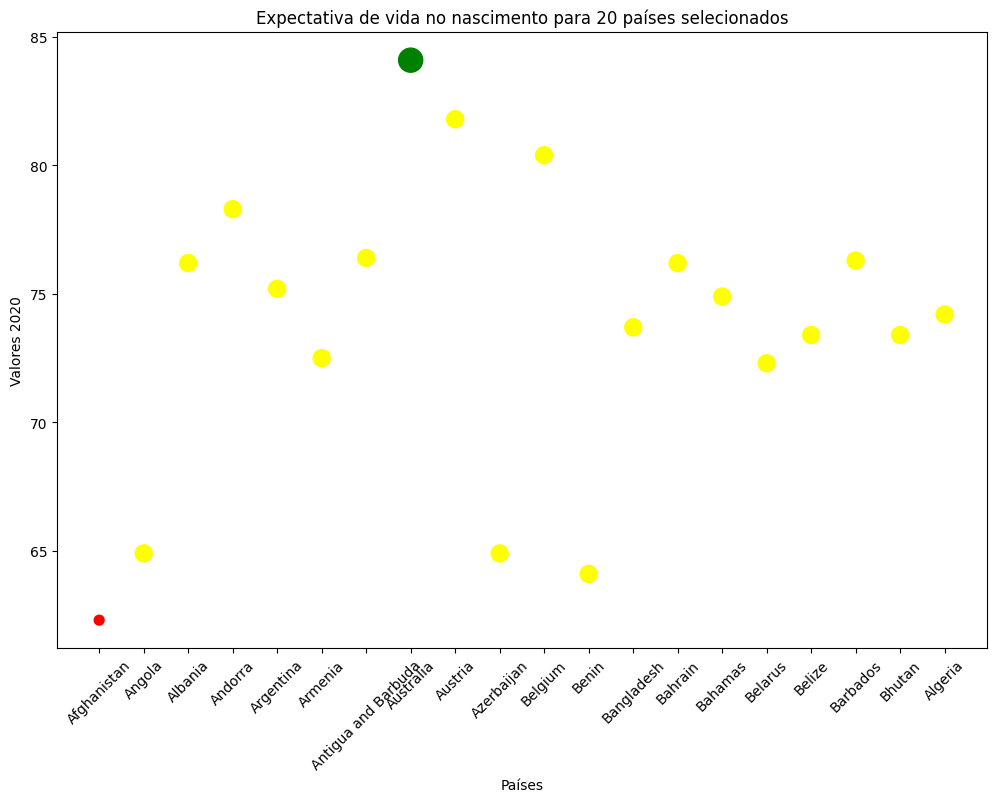

In [ ]:
# Conferindo se realmente tem 20 países
if data['country'].nunique() < 20:
    print("Não há países suficientes no arquivo CSV para selecionar 20.")
else:
    # Selecionando os 20 países aleatórios
    sampled_data = data.groupby('country').sample(n=1, random_state=42)  # Garantir que há uma amostra por país
    sampled_countries = sampled_data['country'].unique()[:20]

    filtered_data = data[data['country'].isin(sampled_countries)].copy()

    # Definindo as cores e tamanhos de acordo com os valores
    min_value = filtered_data['2020'].min()
    max_value = filtered_data['2020'].max()

    def get_color(value):
        if value == min_value:
            return 'red'
        elif value == max_value:
            return 'green'
        else:
            return 'yellow'

    def get_size(value):
        if value == min_value:
            return 50   # Tamanho pequeno
        elif value == max_value:
            return 300  # Tamanho grande
        else:
            return 150  # Tamanho intermediário

    filtered_data['color'] = filtered_data['2020'].apply(get_color)
    filtered_data['size'] = filtered_data['2020'].apply(get_size)

    plt.figure(figsize=(12, 8))  # Tamanho da imagem
    plt.scatter(filtered_data['country'], filtered_data['2020'],
                c=filtered_data['color'], s=filtered_data['size'])

    # Título e rótulos
    plt.title('Expectativa de vida no nascimento para 20 países selecionados')
    plt.xlabel('Países')
    plt.ylabel('Valores 2020')

    # Deixa os nomes em 45°
    plt.xticks(rotation=45)

    plt.show()